In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras

from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN 5005)


In [2]:
ds = pd.read_csv('fer2013.csv')
d = ds.values
d.shape

(35887, 3)

In [3]:
arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
c = np.array([7, 8 ,9])
arr = np.vstack((arr, c))
#print arr

x = [1, 2, 3]
y = [4, 5, 6]

p = np.array(x)
print p

print x

[1 2 3]
[1, 2, 3]


In [4]:
labels = d[:, 0]
print labels.shape

tem = d[:, 1]
pixels = np.zeros((d.shape[0], 48*48))
# t = d[0, 1]
# t = t.split()
# t = [ int(z) for z in t ]
# data1 = np.array(t)
# print data1

# for ix in range(1, d.shape[0]):
#     tem = d[ix, 1]
#     tem = tem.split()
#     tem = [ int(z) for z in tem ]
#     data = np.vstack((data, np.array(tem)))

for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])


(35887,)


In [5]:
print pixels.shape
    
print pixels[:2, :10]

#normalize #data preprocessing
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)

print pixels[:2, :10]

(35887, 2304)
[[  70.   80.   82.   72.   58.   58.   60.   63.   54.   58.]
 [ 151.  150.  147.  155.  148.  133.  111.  140.  170.  174.]]
[[-0.60646962 -0.4562069  -0.4011047  -0.50456157 -0.67067463 -0.66569461
  -0.6410465  -0.60871772 -0.75621507 -0.73092633]
 [ 0.37587539  0.40796695  0.41422283  0.55721626  0.50643161  0.33794788
   0.05679587  0.46676644  0.89310809  0.94130151]]


In [6]:
y = np_utils.to_categorical(labels)
print y.shape

(35887, 7)


In [7]:
split = int(0.80*pixels.shape[0])

x_train = pixels[:split]
y_train = y[:split]

x_test = pixels[split:]
y_test = y[split:]

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape

(28709, 2304) (7178, 2304)
(28709, 7) (7178, 7)


In [8]:
x_train = x_train.reshape((x_train.shape[0], 1, 48, 48))
x_test = x_test.reshape((x_test.shape[0], 1, 48, 48))

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape

(28709, 1, 48, 48) (7178, 1, 48, 48)
(28709, 7) (7178, 7)


In [10]:
conv_model = Sequential()

conv_model.add(Convolution2D(64, 3, 3, input_shape=(1, 48, 48), activation='relu'))
conv_model.add(Convolution2D(64, 3, 3, activation='relu'))
conv_model.add(Convolution2D(64, 3, 3, activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))

conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.5))

conv_model.add(Flatten())
conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(7))
conv_model.add(Activation('softmax'))

conv_model.summary()
#keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
conv_model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_7 (Convolution2D)  (None, 64, 46, 46)    640         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 64, 44, 44)    36928       convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 64, 42, 42)    36928       convolution2d_8[0][0]            
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 64, 21, 21)    0           convolution2d_9[0][0]            
___________________________________________________________________________________________

In [12]:
hist = conv_model.fit(x_train, y_train,
                     nb_epoch=4,
                     shuffle=True,
                      batch_size=256,
                     validation_data=(x_test, y_test))

Train on 28709 samples, validate on 7178 samples
Epoch 1/4
28709/28709 [==============================] - 71s - loss: 1.0986 - acc: 0.5880 - val_loss: 1.1326 - val_acc: 0.5673
Epoch 2/4
28709/28709 [==============================] - 77s - loss: 1.0740 - acc: 0.5974 - val_loss: 1.1175 - val_acc: 0.5712
Epoch 3/4
28709/28709 [==============================] - 78s - loss: 1.0521 - acc: 0.6059 - val_loss: 1.1141 - val_acc: 0.5711
Epoch 4/4
28709/28709 [==============================] - 78s - loss: 1.0309 - acc: 0.6125 - val_loss: 1.1201 - val_acc: 0.5736


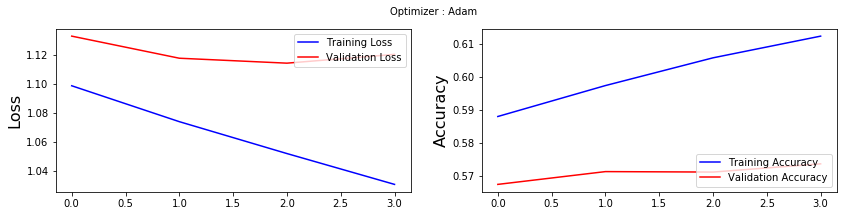

In [13]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [14]:
test = np.zeros((d.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

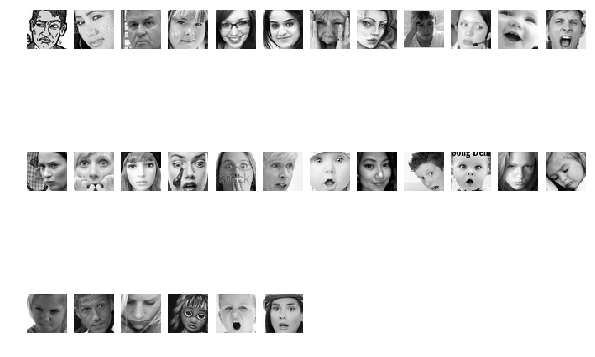

In [15]:
fig = plt.figure(figsize=(10,10))

for ix in range(30):
    ax = plt.subplot(4,12,ix+1)
    ax.set_title = ix
    plt.imshow(test[split+ix].reshape((48, 48)), cmap='gray')
    plt.axis('off')

In [298]:
pre = x_test[:100]
print pre.shape
ans = conv_model.predict(pre, batch_size=3)

correct=0
for ix in range(100):
    if np.argmax(ans[ix]) == np.argmax(y_test[ix]):
        correct += 1
        
print correct

(100, 1, 48, 48)
58


In [16]:
x_eval = x_test[343:3456]
y_eval = y[split+343:split+3456]

score = conv_model.evaluate(x_eval, y_eval, show_accuracy=True, verbose=0)

/home/laksh/ml/local/lib/python2.7/site-packages/keras/models.py:651: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [17]:
print "Score : ", score[0]
print "Accuracy : ", score[1]*100

Score :  1.14167673275
Accuracy :  56.4728557661


In [22]:
import h5py
conv_model.save('face_reco.h5')  # creates a HDF5 file 'my_model.h5'
f = h5py.File('face_reco.h5', 'r+')
del f['optimizer_weights']
f.close()